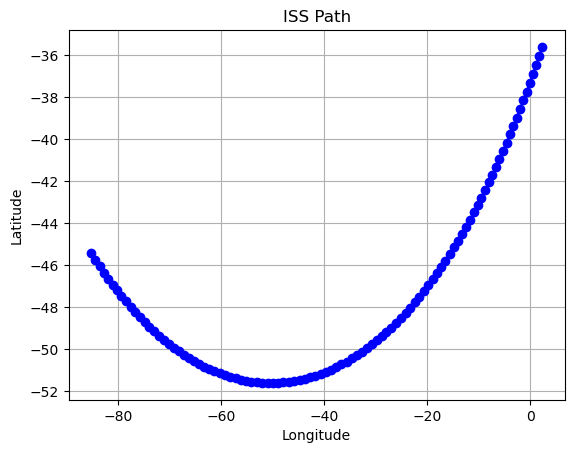

In [1]:
import requests
import matplotlib.pyplot as plt
import time

def track_iss():
    url = 'http://api.open-notify.org/iss-now.json'
    data_points = []

    for _ in range(100):
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            latitude = float(data['iss_position']['latitude'])
            longitude = float(data['iss_position']['longitude'])
            timestamp = data['timestamp']
            data_points.append((latitude, longitude, timestamp))
        else:
            print('Error retrieving ISS location')
        time.sleep(10)  # Pause for 10 seconds before making the next request

    return data_points

def plot_iss_path(data_points):
    latitudes = [point[0] for point in data_points]
    longitudes = [point[1] for point in data_points]

    plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('ISS Path')
    plt.grid(True)
    plt.show()

data_points = track_iss()
plot_iss_path(data_points)
